In [1]:
import numpy as np
import matplotlib.pyplot as plt

from theoretical import *

In [19]:
# Setup
np.random.seed(4198)

N = 5000  # number of samples
S_0, r, sig, T = 50.0, 0.05, 0.2, 1.0
K_values = np.linspace(60, 80, 10 + 1)

In [8]:
# function for simulating plain monte carlo
def plain(K):
    Z = np.random.normal(0, 1, 2 * N)
    S_T = S_0 * np.exp((r - 0.5 * sig**2) * T + sig * np.sqrt(T) * Z)
    
    payoffs = np.maximum(S_T - K, 0)
    discounted_payoffs = np.exp(-r * T) * payoffs
    
    est = np.mean(discounted_payoffs)
    se = np.std(discounted_payoffs, ddof=1) / np.sqrt(2 * N)
    re = se / np.abs(est)

    return est, se, re

In [11]:
# function for simulating with antithetic sampling
def antithetic(K):
    Z = np.random.normal(0, 1, N)
    S_T1 = S_0 * np.exp((r - 0.5 * sig**2) * T + sig * np.sqrt(T) * Z)
    S_T2 = S_0 * np.exp((r - 0.5 * sig**2) * T - sig * np.sqrt(T) * Z)
    
    payoffs1 = np.maximum(S_T1 - K, 0)
    payoffs2 = np.maximum(S_T2 - K, 0)
    discounted_payoffs = np.exp(-r * T) * (payoffs1 + payoffs2) / 2
    
    est = np.mean(discounted_payoffs)
    se = np.std(discounted_payoffs, ddof=1) / np.sqrt(2 * N)
    re = se / np.abs(est)

    return est, se, re

In [20]:
plain_res = []
anti_res = []
for K in K_values:
    plain_est, plain_se, plain_re = plain(K)
    anti_est, anti_se, anti_re = antithetic(K)

    plain_res.append(plain_re)
    anti_res.append(anti_re)
    
    print(f"Strike Price: {K}")
    print(f"Plain MC Estimate: {plain_est:.4f}, S.E.: {plain_se:.4f}, R.E.: {plain_re:.2%}")
    print(f"Antithetic Estimate: {anti_est:.4f}, S.E.: {anti_se:.4f}, R.E.: {anti_re:.2%}")
    print("-" * 50)

Strike Price: 60.0
Plain MC Estimate: 1.6005, S.E.: 0.0427, R.E.: 2.67%
Antithetic Estimate: 1.6068, S.E.: 0.0287, R.E.: 1.79%
--------------------------------------------------
Strike Price: 62.0
Plain MC Estimate: 1.2647, S.E.: 0.0377, R.E.: 2.98%
Antithetic Estimate: 1.1984, S.E.: 0.0247, R.E.: 2.07%
--------------------------------------------------
Strike Price: 64.0
Plain MC Estimate: 0.9069, S.E.: 0.0315, R.E.: 3.47%
Antithetic Estimate: 0.9448, S.E.: 0.0225, R.E.: 2.38%
--------------------------------------------------
Strike Price: 66.0
Plain MC Estimate: 0.7295, S.E.: 0.0293, R.E.: 4.02%
Antithetic Estimate: 0.6579, S.E.: 0.0187, R.E.: 2.84%
--------------------------------------------------
Strike Price: 68.0
Plain MC Estimate: 0.4938, S.E.: 0.0234, R.E.: 4.73%
Antithetic Estimate: 0.5433, S.E.: 0.0171, R.E.: 3.14%
--------------------------------------------------
Strike Price: 70.0
Plain MC Estimate: 0.3743, S.E.: 0.0201, R.E.: 5.38%
Antithetic Estimate: 0.4705, S.E.: 0.0

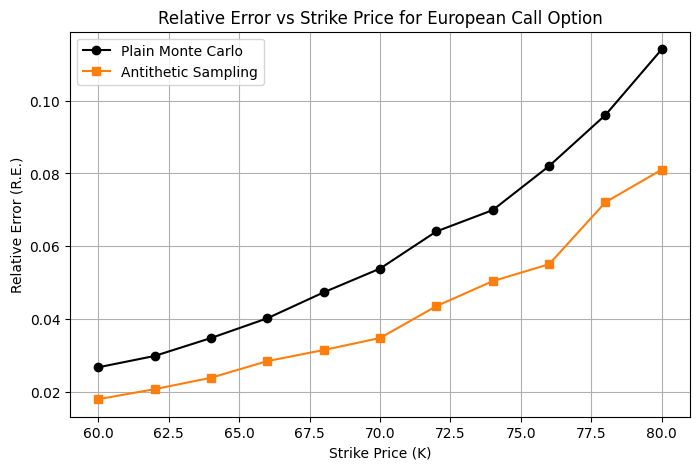

In [22]:
# Plot R.E. vs Strike Price
plt.figure(figsize=(8, 5))
plt.plot(K_values, plain_res, color='black', marker='o', label='Plain Monte Carlo')
plt.plot(K_values, anti_res, color='tab:orange', marker='s', label='Antithetic Sampling')

plt.xlabel('Strike Price (K)')
plt.ylabel('Relative Error (R.E.)')
plt.title('Relative Error vs Strike Price for European Call Option')

plt.legend()
plt.grid()
plt.savefig('../report/assets/antithetic-sampling-re-vs-strike-price.png')